In [ ]:
#!pip install tensorflow==2.3

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/faces.csv")

In [ ]:
df

In [ ]:
df.drop(df.columns[[0]],axis=1,inplace=True)
X = np.array(df.drop("target", axis=1))

In [ ]:
X.shape

(18, 128)

In [ ]:
X.shape 

(18, 128)

In [ ]:
y = np.array(df.target)

In [ ]:
y

array(['BillGates', 'BillGates', 'BillGates', 'BillGates', 'BillGates',
       'BillGates', 'LarryPage', 'LarryPage', 'LarryPage', 'LarryPage',
       'LarryPage', 'LarryPage', 'MarkZuckerberg', 'MarkZuckerberg',
       'MarkZuckerberg', 'MarkZuckerberg', 'MarkZuckerberg',
       'MarkZuckerberg'], dtype=object)

### Misturando tudo


In [ ]:
from sklearn.utils import shuffle

In [ ]:
trainX, trainY = shuffle(X, y, random_state = 0)

In [ ]:
trainY

array(['BillGates', 'LarryPage', 'LarryPage', 'LarryPage',
       'MarkZuckerberg', 'BillGates', 'BillGates', 'MarkZuckerberg',
       'MarkZuckerberg', 'LarryPage', 'LarryPage', 'MarkZuckerberg',
       'LarryPage', 'BillGates', 'BillGates', 'BillGates',
       'MarkZuckerberg', 'MarkZuckerberg'], dtype=object)

### Tratar labels - Dicretização

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
out_encoder = LabelEncoder()

In [ ]:
out_encoder.fit(trainY)

LabelEncoder()

In [ ]:
trainY = out_encoder.transform(trainY)

In [ ]:
trainY

array([0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2])

## Validações

In [ ]:
df_val = pd.read_csv("/content/drive/My Drive/Colab Notebooks/faces_validation.csv")

In [ ]:
df_val.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,target
13,13,-1.413975,-0.971029,-0.760367,0.119010,0.836146,0.889640,0.248453,1.459031,0.857749,0.069923,-0.031315,-1.952145,-1.477585,0.205472,0.302617,0.805768,1.251030,-0.276663,-0.883775,-0.018271,0.880210,-0.720074,0.184486,1.243186,-1.288553,1.213295,1.469310,0.107159,-1.445446,0.324325,-0.390331,1.420413,-0.683057,0.546319,0.744603,0.939686,-0.881384,-1.826827,0.727844,...,0.030136,1.052892,0.269275,-0.904665,0.743418,-0.528178,1.639574,-1.464742,0.037048,-1.288997,1.325846,-0.296700,0.810272,0.154281,-0.564372,-0.336617,-1.701875,-1.255124,-0.131423,0.531112,0.265101,-0.670167,-0.105735,0.910796,1.158256,-0.497949,-1.445880,0.311329,0.307403,0.403381,-0.243615,-0.584178,0.211148,1.035493,-1.433141,-0.744511,0.217167,2.473378,-0.657083,MarkZuckerberg
14,14,-1.806113,-0.806476,-1.326948,0.276126,2.023107,1.331942,-0.168979,1.900950,2.190738,-0.412248,0.210956,-1.811059,-1.886069,-0.249668,0.155876,0.099851,0.533211,-0.864757,-1.556120,0.600623,0.551712,-0.139525,-0.052810,0.818905,-0.970396,1.509520,1.912179,-0.048065,-0.589924,-0.236365,-0.158887,1.095656,-0.430792,-0.492466,0.608074,0.761415,-1.295833,-1.589807,0.656779,...,-0.574006,0.436459,-1.255605,-0.673909,0.307335,-1.550394,1.575882,-2.927403,0.550684,-1.043148,1.179827,-0.888166,0.228334,-0.058562,-0.086999,-0.943446,-1.073898,-0.544711,-0.594598,0.322870,0.678714,-0.429804,0.224337,1.305628,-0.081639,0.389659,-0.741850,-0.209244,-0.183526,0.597094,0.029935,0.149080,0.725910,0.484980,-0.464365,-0.595427,0.325190,2.185082,0.309907,MarkZuckerberg
15,15,-1.472212,-0.856085,-0.747762,0.029967,1.158042,0.861021,0.110202,1.579154,0.994632,0.096906,0.250704,-2.046972,-1.418715,0.089015,0.601160,0.650919,1.075069,-0.459418,-1.047965,0.101723,0.842957,-0.712920,0.223088,1.593712,-1.258485,1.174881,1.490068,0.236134,-1.492898,-0.082220,-0.445844,1.297713,-0.845896,0.514223,0.625670,1.101052,-0.848666,-1.918707,0.864064,...,-0.074573,1.245504,0.167900,-0.818234,0.783361,-0.398562,1.552746,-1.375349,0.097413,-1.192254,1.412511,-0.418067,0.650784,0.158866,-0.437585,-0.322840,-1.534139,-1.004055,0.013246,0.574832,0.395206,-0.705836,-0.145654,0.942209,0.928776,-0.258336,-1.408133,0.297274,0.420300,0.470280,-0.210223,-0.600763,0.210918,1.059064,-1.350380,-0.773380,0.086481,2.554627,-0.548303,MarkZuckerberg
16,16,-1.666857,-0.674972,-1.523313,-0.263358,2.057108,1.088505,-0.190231,1.713013,2.311479,-0.170720,0.306063,-1.920096,-2.082732,-0.489684,0.480702,0.265808,0.394096,-0.550350,-1.453146,0.482519,0.864380,-0.548434,-0.061394,1.029718,-0.903399,1.227599,2.047621,-0.181734,-0.795831,-0.071018,-0.339807,1.066542,-0.604614,-0.118675,0.581756,0.559410,-1.433532,-1.627762,0.654937,...,-0.410567,0.284529,-1.187712,-0.803551,0.415985,-1.268961,1.529643,-3.060236,0.188311,-1.284936,1.282841,-0.631972,0.212766,0.040545,0.295756,-0.830283,-1.065927,-0.662741,-0.347513,0.236327,0.511770,0.005307,-0.284172,1.051796,0.159612,0.121871,-0.818611,-0.190881,0.051861,0.521368,0.145928,0.293852,1.107488,0.283144,-0.649233,-1.142589,0.400611,2.352864,-0.142574,MarkZuckerberg
17,17,-1.357393,-1.355890,-0.978747,-0.396194,1.283796,1.155510,-0.130353,1.369700,1.016933,0.063294,0.141240,-1.913192,-1.432036,-0.057649,0.909810,1.007257,1.318857,-0.028435,-0.818055,1.153250,1.192369,-0.236103,0.710372,1.508194,-1.250530,1.180667,2.084791,0.144309,-0.893737,0.078178,-0.179173,1.346644,-0.125513,0.172100,0.495572,1.281758,-1.023089,-1.799565,0.459649,...,-0.477434,0.727441,0.108442,-0.667048,0.839706,-0.875842,1.120563,-2.200705,-0.227423,-0.884980,1.552591,-0.527273,0.820302,0.576642,-0.602384,-0.199696,-2.245900,-0.570709,0.150994,0.983571,0.088696,-0.364536,-0.281368,0.812526,0.847919,-0.102129,-0.886250,0.457190,1.100582,-0.071093,0.04

In [ ]:
df_val.drop(df.columns[[0]],axis=1,inplace=True)
valX = np.array(df_val.drop("target", axis=1))
valY = np.array(df_val.target)

In [ ]:
out_encoder.fit(valY)

LabelEncoder()

In [ ]:
valY = out_encoder.transform(valY)

## Avalaindo algorítmos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
yhat_train = knn.predict(trainX)  
yhat_val   = knn.predict(valX)

In [ ]:
yhat_val

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def print_confusion_matrix(model_name, valY, yhat_val):

  cm = confusion_matrix(valY, yhat_val)
  total = sum(sum(cm))
  acc = (cm[0,0] + cm[1,1])/ total
  sensitivity = cm[0,0] / (cm[0, 0] + cm[0, 1])
  specifity = cm[1,1] / (cm[1, 0] + cm[1,1])

  print("MODELO : {}".format(model_name))
  print("Acurácia : {:.4f}".format(acc))
  print("Sensitividade: {:.4f}".format(sensitivity))
  print("Especificidade: {:.4f}".format(specifity))

  from mlxtend.plotting import plot_confusion_matrix
  fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5))
  plt.show()

MODELO : KNN
Acurácia : 0.6667
Sensitividade: 1.0000
Especificidade: 1.0000


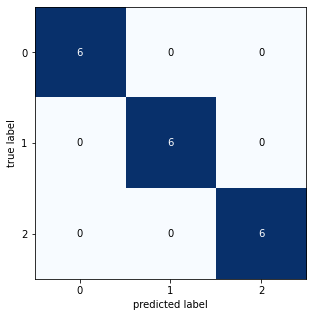

In [ ]:
print_confusion_matrix("KNN", valY, yhat_val)

## SVM

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(trainX, trainY)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yhat_train = svm.predict(trainX)  
yhat_val   = svm.predict(valX)

MODELO : SVM
Acurácia : 0.6667
Sensitividade: 1.0000
Especificidade: 1.0000


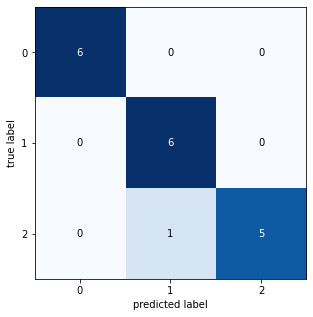

In [ ]:
print_confusion_matrix("SVM", valY, yhat_val)

## Usando Keras

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
trainY

array([0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2])

In [ ]:
trainY = to_categorical(trainY, 3)

In [ ]:
valY

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [ ]:
valY = to_categorical(valY, 3)

In [ ]:
from tensorflow.keras import  models
from tensorflow.keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(128,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation="softmax")) #Colocar a quantidade de classes aqui

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 8,451
Trainable params: 8,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
trainX

array([[-1.2524968 ,  0.6043868 , -0.38333088, ..., -1.6152943 ,
        -0.905433  ,  0.51285756],
       [-1.2525052 ,  0.634516  , -0.09817094, ..., -0.7813202 ,
         2.1505768 ,  0.01328453],
       [-0.40144083,  0.85655785,  0.847138  , ..., -0.7936352 ,
         0.9955149 , -0.20686355],
       ...,
       [-0.8026322 , -0.2823723 , -0.686766  , ..., -1.1368806 ,
        -0.85431236,  0.26396576],
       [-1.472212  , -0.8560846 , -0.7477625 , ...,  0.08648055,
         2.5546267 , -0.5483029 ],
       [-1.4541013 , -1.1896234 , -1.19844   , ...,  0.5041103 ,
         1.8826374 , -0.71643883]])

In [ ]:
model.fit(trainX, trainY, epochs=100, batch_size=8)

In [ ]:
yhat_train = model.predict(trainX)
yhat_val   = model.predict(valX)

In [ ]:
yhat_val = np.argmax(yhat_val, axis=1)
yhat_val

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [ ]:
valY = np.argmax(valY, axis=1)

In [ ]:
valY

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

MODELO : KERAS
Acurácia : 0.6667
Sensitividade: 1.0000
Especificidade: 1.0000


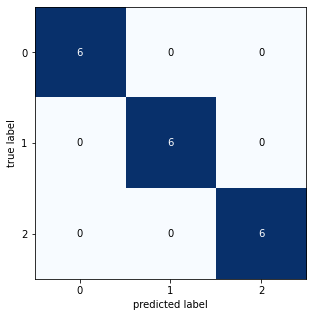

In [ ]:
print_confusion_matrix("KERAS", valY, yhat_val)

In [ ]:
model.save("faces.h5", )